## 指定のディレクトリからデータを読みだして学習に掛ける

In [1]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K

Using TensorFlow backend.


In [2]:
with open("./t_fal_audio_data/np_data.dat", mode="rb") as f:
    data=np.fromfile(f,dtype=float)

### データは1配列で返されるので書き込み時の状態に変換する

In [3]:
size=2**12 #サンプリングのデータサイズを入力
n=int(len(data)/(size+1))

data=data.reshape((n, size+1))

print(type(data))
print(len(data))
print(len(data[0]))
print(data[0])

<class 'numpy.ndarray'>
40
4097
[0.214      0.11075341 0.15259981 ... 0.02155629 0.05022515 0.15259981]


In [4]:
temp_data=np.array([])
sound_data=np.array([])
for i in range(len(data)):
    temp_data=np.append(temp_data, data[i][0].real)
    sound_data=np.append(sound_data, data[i][1:])

sound_data=sound_data.reshape((n,size))

"""
temp_data:測定温度の配列(float)
sound_data:音声スペクトルデータの2次元配列([[complex]...[]])
"""

    
print(len(sound_data[0]))
print(temp_data)
print(type(temp_data[0]))

4096
[0.214 0.24  0.265 0.345 0.308 0.346 0.33  0.34  0.42  0.38  0.431 0.423
 0.482 0.479 0.501 0.503 0.513 0.579 0.55  0.567 0.592 0.689 0.636 0.661
 0.671 0.69  0.718 0.759 0.75  0.775 0.856 0.795 0.831 0.833 0.861 0.91
 0.886 0.92  0.942 0.94 ]
<class 'numpy.float64'>


<font size=5 color="red">予測データの用意</font>

In [5]:
with open("./t_fal_audio_data/np_prediction_data.dat", mode="rb") as f:
    prediction_data=np.fromfile(f,dtype=float)

prediction_data=prediction_data.reshape((10,4097))

prediciton_temp_data=np.array([])
prediciton_sound_data=np.array([])
for i in range(len(prediction_data)):
    prediciton_temp_data=np.append(prediciton_temp_data, prediction_data[i][0])
    prediciton_sound_data=np.append(prediciton_sound_data, prediction_data[i][1:])
    
prediciton_sound_data=prediciton_sound_data.reshape((10,4096))

print(prediciton_temp_data)
print(prediciton_sound_data)

[33.  42.2 49.8 60.5 67.  70.5 75.9 82.1 85.8 91.7]
[[0.07170207 0.08974837 0.0852675  ... 0.07528725 0.0852675  0.08974837]
 [0.081953   0.09420389 0.10618163 ... 0.0246869  0.10618163 0.09420389]
 [0.17753448 0.0796667  0.05342869 ... 0.11737094 0.05342869 0.0796667 ]
 ...
 [0.01008851 0.07105503 0.08758143 ... 0.03424141 0.08758143 0.07105503]
 [0.11010878 0.07297494 0.02128973 ... 0.03864819 0.02128973 0.07297494]
 [0.03787634 0.02785253 0.10334471 ... 0.37592443 0.10334471 0.02785253]]


# TFのkerasで学習装置を実装してみる

In [6]:
model=keras.Sequential([
    keras.layers.Dense(4096, activation=tf.nn.relu, input_dim=4096),
    keras.layers.Dense(2048, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(1)
])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
#optimizer = tf.train.RMSPropOptimizer(0.5)
optimizer = keras.optimizers.Adadelta()

def abs_percent(y_ture, y_pred):
    return 1-abs((y_pred-y_ture)/y_ture)

"""
model.compile(loss='mse',
            optimizer=optimizer,
            metrics=[abs_percent])
"""
model.compile(loss='mse',
            optimizer=optimizer)

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 27,860,737
Trainable params: 27,860,737
Non-trainable params: 0
________________________________________________________________

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
40/40 [==============================] - 2s 52ms/step - loss: 1.4182
Epoch 2/50
40/40 [==============================] - 1s 18ms/step - loss: 0.3346
Epoch 3/50
40/40 [==============================] - 1s 19ms/step - loss: 0.1147
Epoch 4/50
40/40 [==============================] - 1s 18ms/step - loss: 0.3197
Epoch 5/50
40/40 [==============================] - 1s 19ms/step - loss: 0.0899
Epoch 6/50
40/40 [==============================] - 1s 18ms/step - loss: 0.0998
Epoch 7/50
40/40 [==============================] - 1s 19ms/step - loss: 0.0424
Epoch 8/50
40/40 [==============================] - 1s 19ms/step - loss: 0.0497
Epoch 9/50
40/40 [==============================] - 1s 19ms/step - loss: 0.1112
Epoch 10/50
40/40 [==============================] - 1s 19ms/step - loss: 0.0578
Epoch 11/50
40/40 [==============================] - 1s 18ms/step - loss: 0.0198
Epoch 12/50
40/40 [==============================] - 1s 18ms/step - lo

KeyError: 'abs_percent'

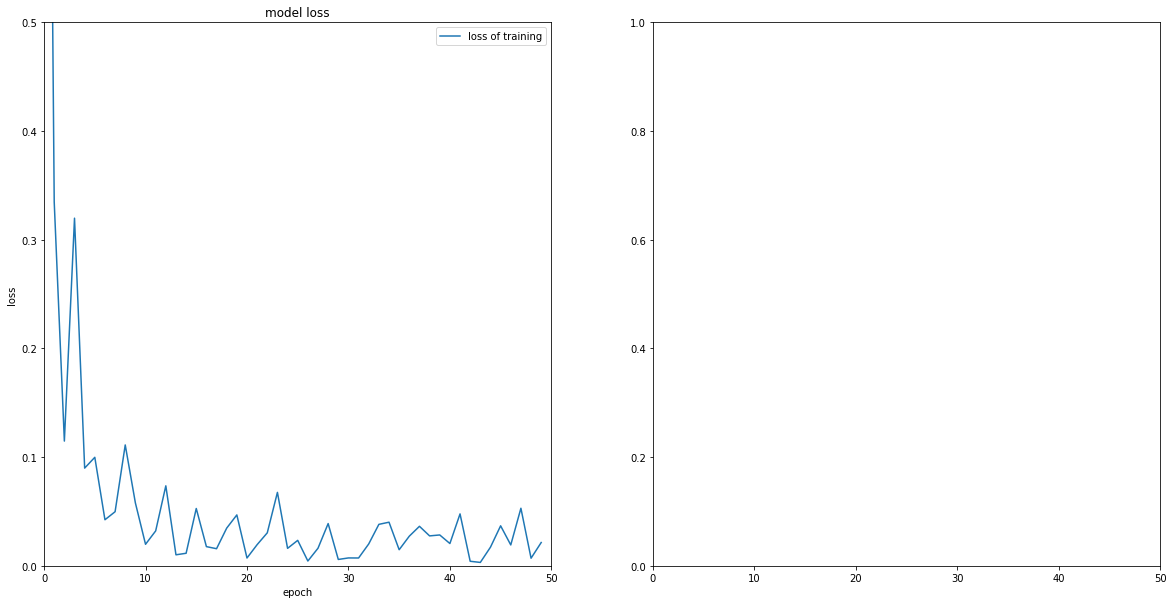

In [8]:
epochs=50

fit=model.fit(sound_data, temp_data, epochs=epochs, callbacks=None, validation_split=0)


plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.xlim(0,epochs)
plt.ylim(0, 0.5)
plt.plot(fit.history['loss'], label="loss of training")
try:
    plt.plot(fit.history['val_loss'], label="loss of validation")
except:
    pass
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.xlim(0,epochs)
plt.ylim(0, 1)
plt.plot(fit.history['abs_percent'], label="acc of training")
try:
    plt.plot(fit.history['val_abs_percent'], label="acc of validation")
except:
    pass
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(sound_data, temp_data)

print("Test_loss:", test_loss)
print("Test_accuracy:", test_acc)

In [ ]:
test_loss, test_acc = model.evaluate(prediciton_sound_data, prediciton_temp_data)

print("Test_loss:", test_loss)
print("Test_accuracy:", test_acc)

## モデルで予想をしてみる

In [ ]:
pre_temp=model.predict(sound_data)

print(type(pre_temp))

error=np.array([])
error_abs=np.array([])
for i in range(len(temp_data)):
    error=np.append(error, (pre_temp[i]-temp_data[i])/temp_data[i]*100)
    error_abs=np.append(error_abs, abs((pre_temp[i]-temp_data[i])/temp_data[i]*100))

np.set_printoptions(precision=2, suppress=True)
print(error)
print(error_abs)
print("error average is {:.2g} %".format(np.mean(error)))
print("error absolute average is {:.2g} %".format(np.mean(error_abs)))

In [ ]:
pre_test_temp=model.predict(prediciton_sound_data)*100

test_error=np.array([])
test_error_abs=np.array([])
for i in range(len(prediciton_temp_data)):
    test_error=np.append(test_error, (pre_test_temp[i]-prediciton_temp_data[i])/prediciton_temp_data[i]*100)
    test_error_abs=np.append(test_error_abs, abs((pre_test_temp[i]-prediciton_temp_data[i])/prediciton_temp_data[i]*100))
    
print(test_error)
print("test error average is {:.2g} %".format(np.mean(test_error)))
print("absolute test error average is {:.2g} %".format(np.mean(test_error_abs)))

print(pre_test_temp)
print(prediciton_temp_data)

In [ ]:
print(pre_temp*100)

### 過学習はなさそう。その代わり、どうしても解析できない部分の温度帯がある。
---
ともあれ、これが現状で一番のモデルであるので保存してリアルタイムの温度測定に用いてみる。
過学習の検証はそこで同時に行える。

In [9]:
model.save("./model")